In [181]:
!pip install tensorflow

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import timedelta


In [183]:
df = pd.read_csv('Dataset/IoTPond2.csv')
df.head()

,created_at,entry_id,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36


# EDA

In [184]:
df.info()
print("Shape\n", df.shape)
print("\nData types\n",df.dtypes)
print("\nMissing values\n",df.isnull().sum())
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172249 entries, 0 to 172248
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              172249 non-null  object 
 1   entry_id                172249 non-null  int64  
 2   Temperature (C)         172249 non-null  float64
 3   Turbidity (NTU)         172249 non-null  int64  
 4   Dissolved Oxygen(g/ml)  172249 non-null  float64
 5   PH                      172249 non-null  float64
 6   Ammonia(g/ml)           172159 non-null  float64
 7   Nitrate(g/ml)           172249 non-null  int64  
 8   Population              172249 non-null  int64  
 9   Fish_Length (cm)        172249 non-null  float64
 10  Fish_Weight (g)         172249 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 14.5+ MB
Shape
 (172249, 11)

Data types
 created_at                 object
entry_id                    int64
Temperature (C)        

,created_at,entry_id,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g)
count,172249,172249.000000,172249.000000,172249.000000,172249.000000,172249.000000,1.721590e+05,172249.000000,172249.0,172249.000000,172249.000000
unique,172249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-06-19 00:00:05 CET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,148725.739702,24.982849,90.974665,9.708503,3.971857,3.112110e+08,719.891448,50.0,23.428782,166.470532
std,NaN,85418.776568,0.901890,21.099910,10.971962,3.960719,1.257809e+10,415.979780,0.0,9.609826,145.752669
min,NaN,1889.000000,-127.000000,1.000000,0.007000,-3.137450,6.590000e-03,45.000000,50.0,6.960000,3.360000
25%,NaN,62717.000000,24.375000,94.000000,3.200000,-0.173180,5.693500e-01,189.000000,50.0,14.220000,22.890000
50%,NaN,147763.000000,24.937500,100.000000,3.283000,7.099040,8.470560e+00,890.000000,50.0,20.970000,65.480000
75%,NaN,226310.000000,25.500000,100.000000,11.739000,7.516670,8.070516e+01,1050.000000,50.0,32.540000,302.500000


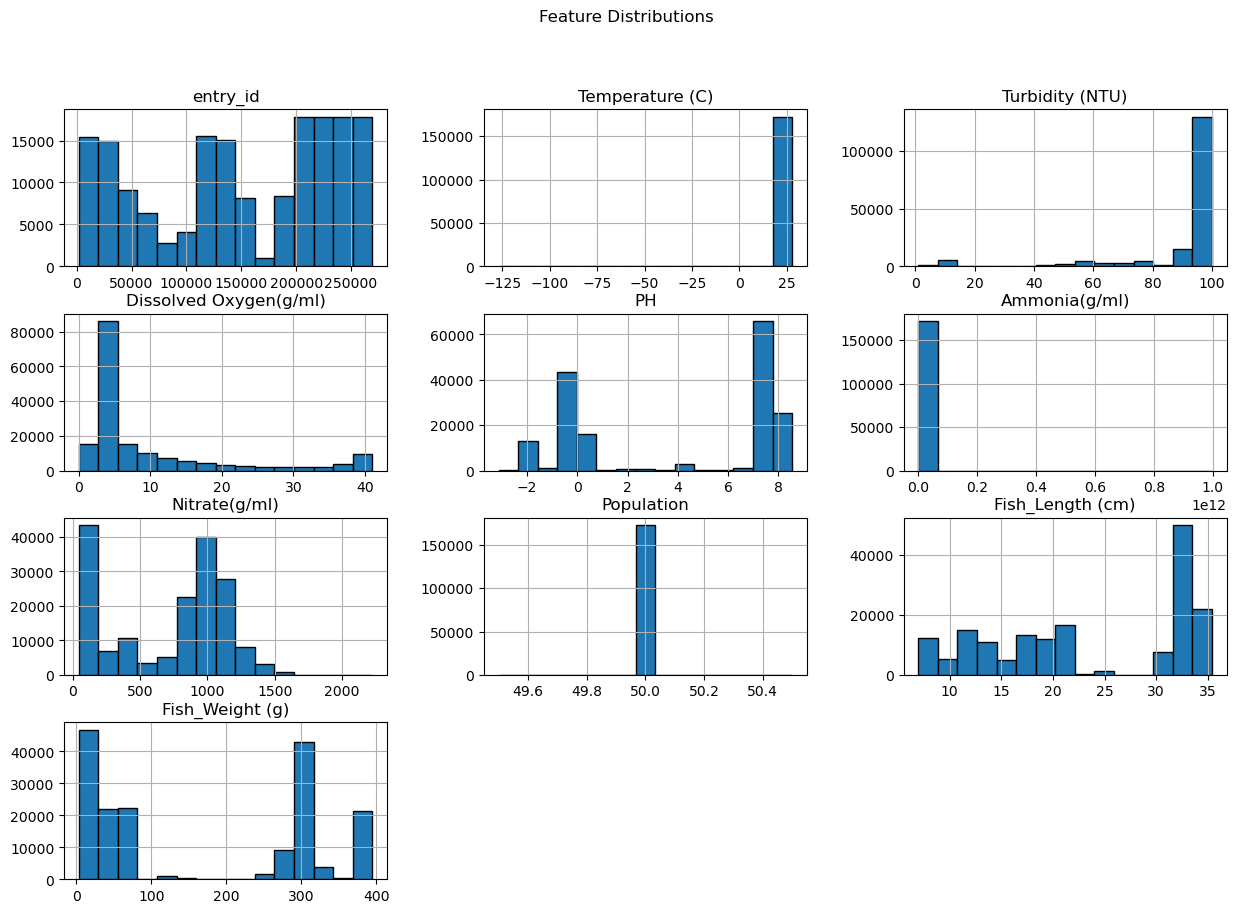

In [185]:
# 1. Histograms
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.savefig("Histogram.png")
plt.show()

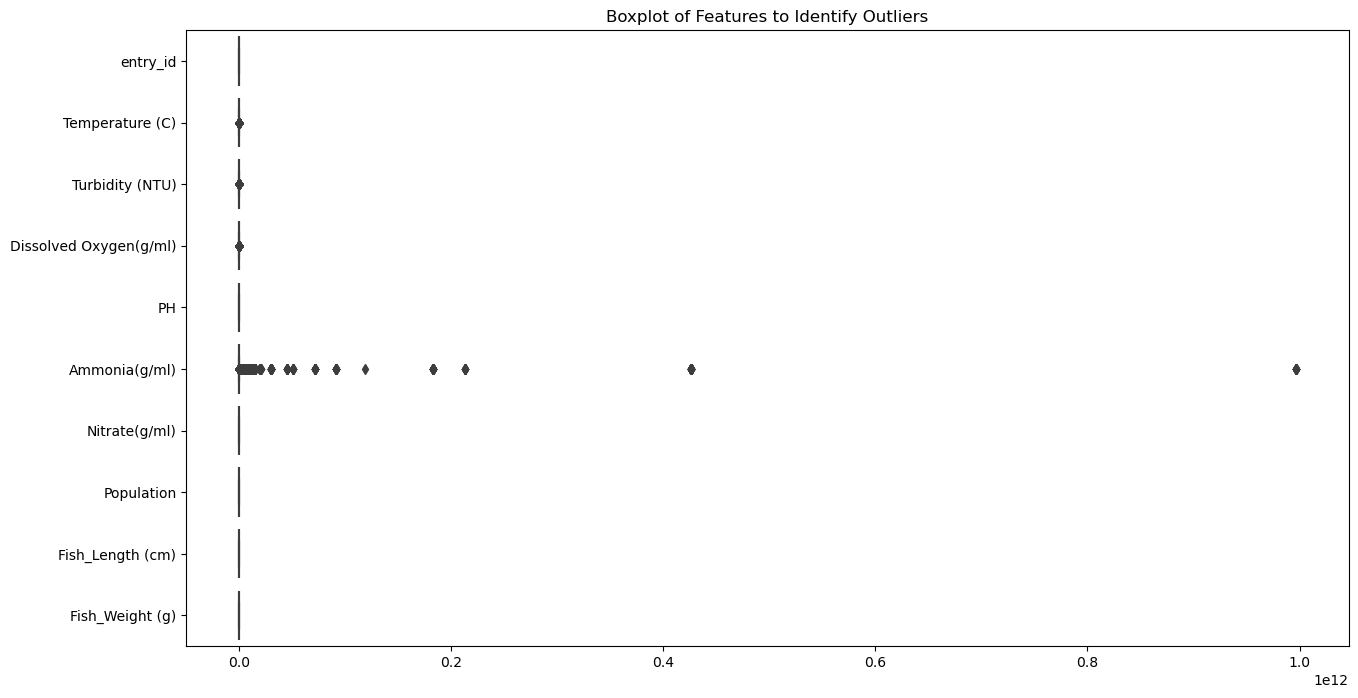

In [186]:
# 2. Box Plots to Identify Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features to Identify Outliers')
plt.savefig("Box Plot.png")
plt.show()

C:\Users\adam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

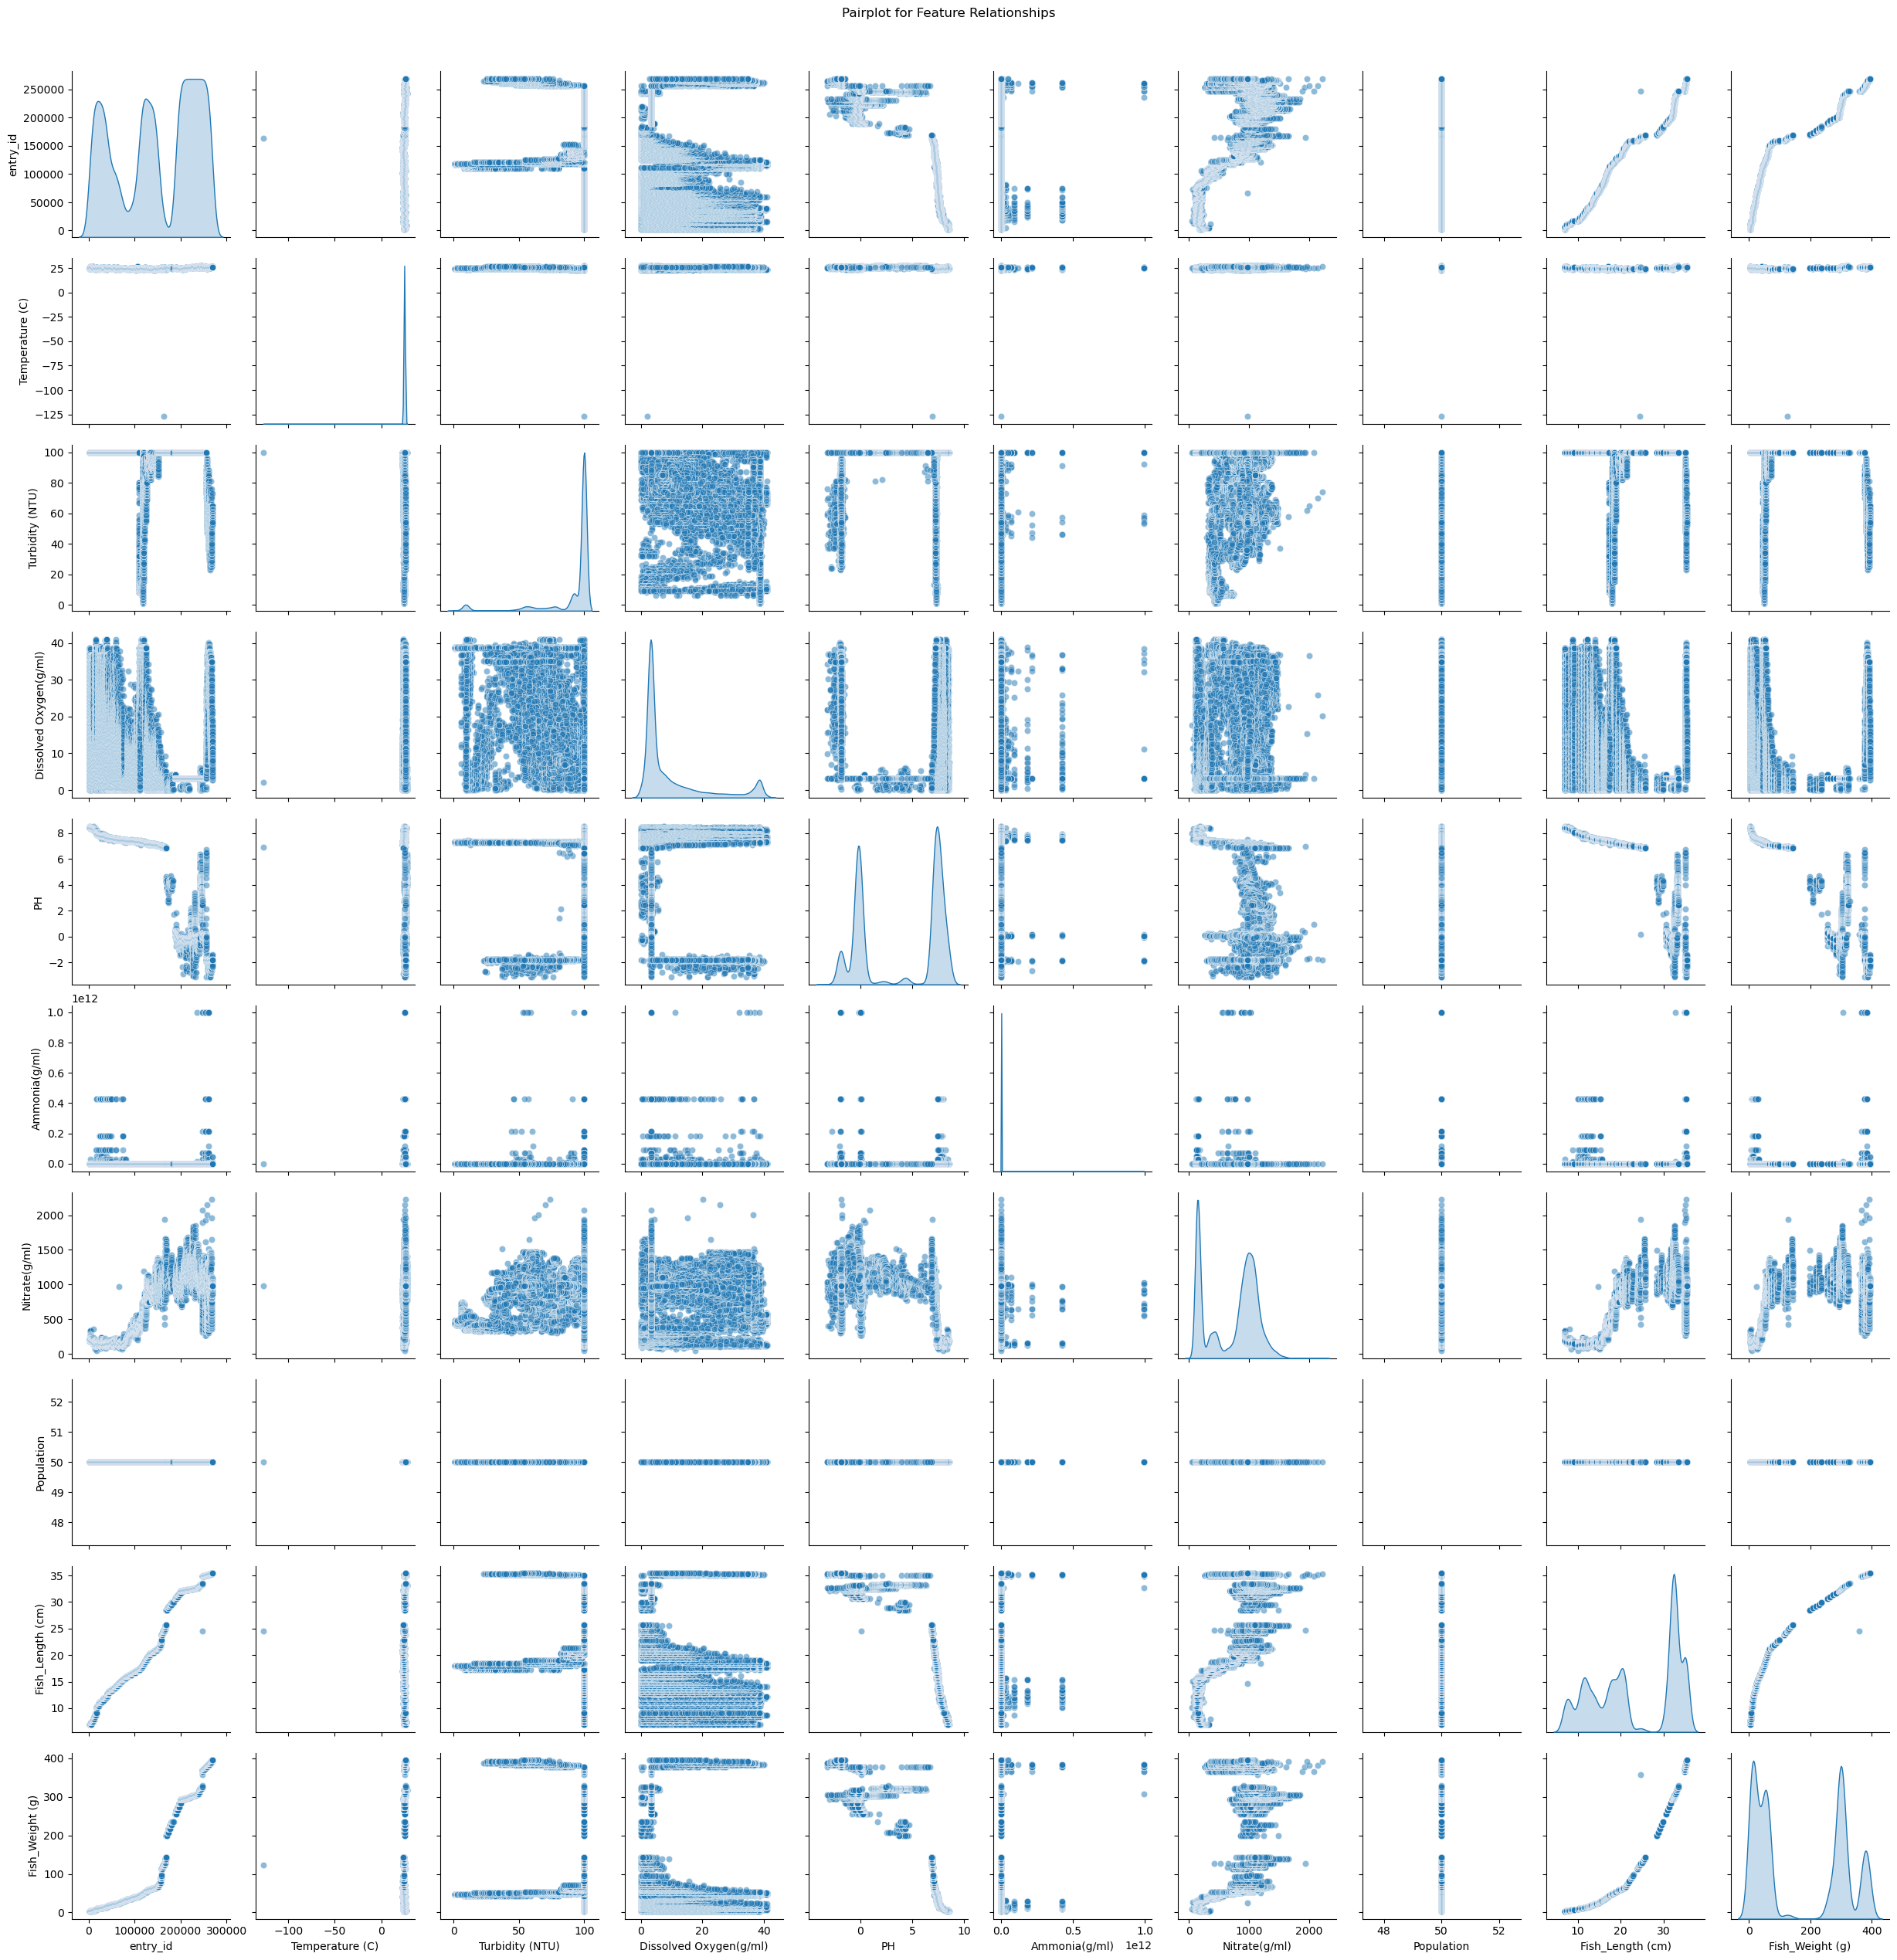

In [187]:
# 3. Pair Plots for Feature Relationships
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot for Feature Relationships', y=1.02)
plt.savefig("Pair Plot.png")
plt.show()

C:\Users\adam\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


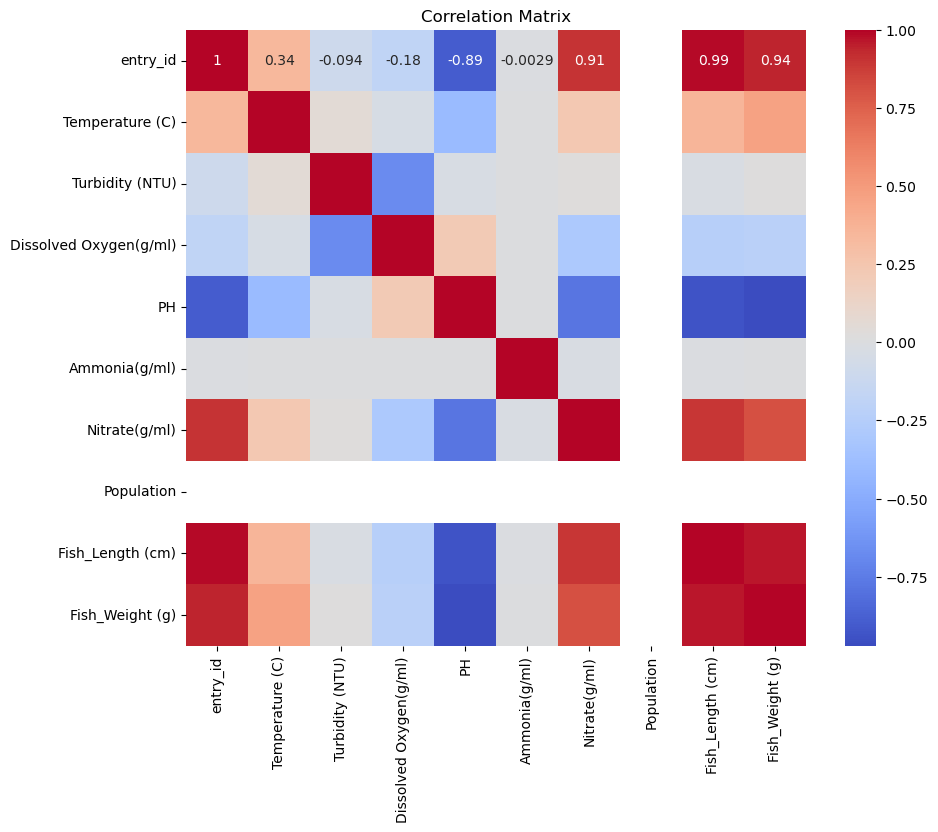

In [188]:
# 4. Correlation Heatmap
df_corr = df.drop(columns=['created_at'])

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("Correlation Matrix.png")
plt.show()

# Data Preprocessing

In [189]:
df['created_at'] = pd.to_datetime(df['created_at'].astype(str).str.replace(' CET', ''), errors='coerce')
df['year_month'] = df['created_at'].dt.to_period('M')

# Extract date features without timezone processing
#df['month'] = df['created_at'].dt.month

In [190]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g),year_month
0,2021-06-19 00:00:05,1889,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06
1,2021-06-19 00:01:02,1890,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06
2,2021-06-19 00:01:22,1891,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06
3,2021-06-19 00:01:44,1892,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06
4,2021-06-19 00:02:07,1893,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06


In [191]:
df = df.drop_duplicates()
df = df.dropna()

In [192]:
selected_columns = ['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)', 'Fish_Length (cm)', 'Fish_Weight (g)']
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[selected_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)


C:\Users\adam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


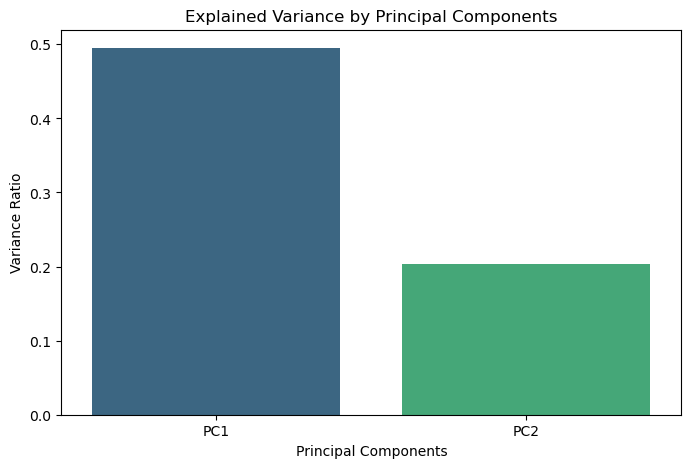

In [193]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['PC1', 'PC2'], y=pca.explained_variance_ratio_, palette="viridis")
plt.title('Explained Variance by Principal Components')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.savefig("PCA.png")
plt.show()

# Data Mining Methods

In [194]:
X = df[['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)']]
y_length = df['Fish_Length (cm)']
y_weight = df['Fish_Weight (g)']

In [195]:
X_train, X_test, y_train_length, y_test_length = train_test_split(X, y_length, test_size=0.2, random_state=42)
X_train, X_test, y_train_weight, y_test_weight = train_test_split(X, y_weight, test_size=0.2, random_state=42)

In [196]:
model_length = RandomForestRegressor(n_estimators=100, random_state=42)
model_length.fit(X_train, y_train_length)

# Make predictions
y_pred_length = model_length.predict(X_test)

# Evaluate the model for Fish Length
mse_length = mean_squared_error(y_test_length, y_pred_length)
r2_length = r2_score(y_test_length, y_pred_length)
print(f'Fish Length - MSE: {mse_length:.2f}, R²: {r2_length:.2f}')

Fish Length - MSE: 0.02, R²: 1.00


In [197]:
model_weight = RandomForestRegressor(n_estimators=100, random_state=42)
model_weight.fit(X_train, y_train_weight)

# Make predictions
y_pred_weight = model_weight.predict(X_test)

# Evaluate the model for Fish Weight
mse_weight = mean_squared_error(y_test_weight, y_pred_weight)
r2_weight = r2_score(y_test_weight, y_pred_weight)
print(f'Fish Weight - MSE: {mse_weight:.2f}, R²: {r2_weight:.2f}')


Fish Weight - MSE: 13.96, R²: 1.00


In [198]:
dates_length = df.loc[y_test_length.index, 'created_at']
dates_weight = df.loc[y_test_weight.index, 'created_at']

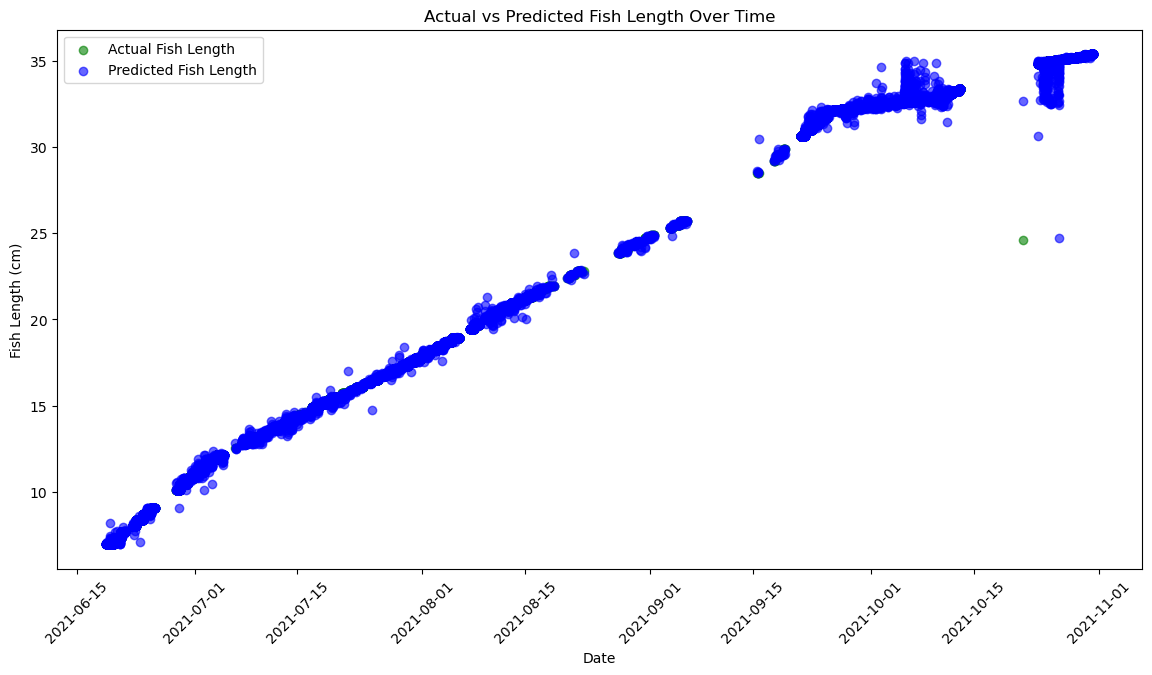

In [199]:
# Plotting the predictions for Fish Length with Date on x-axis
# Plot Fish Length vs. Date
plt.figure(figsize=(14, 7))
plt.scatter(dates_length, y_test_length, color='green', label='Actual Fish Length', alpha=0.6)
plt.scatter(dates_length, y_pred_length, color='blue', label='Predicted Fish Length', alpha=0.6)
plt.title('Actual vs Predicted Fish Length Over Time')
plt.xlabel('Date')
plt.ylabel('Fish Length (cm)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Fish Length Prediction.png")
plt.show()

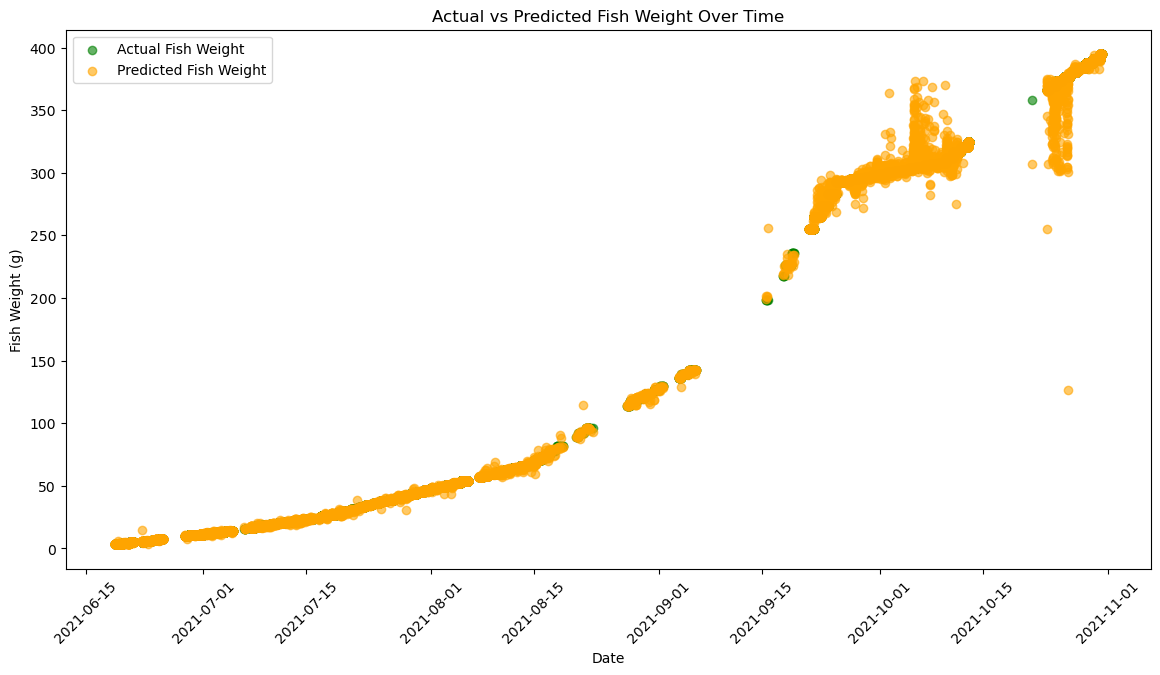

In [200]:
plt.figure(figsize=(14, 7))
plt.scatter(dates_weight, y_test_weight, color='green', label='Actual Fish Weight', alpha=0.6)
plt.scatter(dates_weight, y_pred_weight, color='orange', label='Predicted Fish Weight', alpha=0.6)
plt.title('Actual vs Predicted Fish Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Fish Weight (g)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Fish weight Prediction.png")
plt.show()

In [201]:
start_of_month = df.groupby('year_month').first()
end_of_month = df.groupby('year_month').last()

# Calculate monthly growth in fish weight and length
monthly_growth_weight = end_of_month['Fish_Weight (g)'] - start_of_month['Fish_Weight (g)']
monthly_growth_length = end_of_month['Fish_Length (cm)'] - start_of_month['Fish_Length (cm)']

print(monthly_growth_weight)

# Identify the month with the highest growth
highest_growth_month_weight = monthly_growth_weight.idxmax()
highest_growth_month_length = monthly_growth_length.idxmax()

# Extract optimal water conditions for these months
optimal_conditions_weight = df[df['year_month'] == highest_growth_month_weight][
    ['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)']
].mean()

optimal_conditions_length = df[df['year_month'] == highest_growth_month_length][
    ['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)']
].mean()

print("Optimal conditions for highest weight growth:", optimal_conditions_weight)
print("Optimal conditions for highest length growth:", optimal_conditions_length)

year_month
2021-06      7.70
2021-07     34.74
2021-08     78.74
2021-09    168.30
2021-10     95.46
Freq: M, Name: Fish_Weight (g), dtype: float64
Optimal conditions for highest weight growth: Temperature (C)             24.809527
Turbidity (NTU)            100.000000
Dissolved Oxygen(g/ml)       3.158294
PH                          -0.036547
Ammonia(g/ml)                9.071701
Nitrate(g/ml)             1043.939128
dtype: float64
Optimal conditions for highest length growth: Temperature (C)             24.809527
Turbidity (NTU)            100.000000
Dissolved Oxygen(g/ml)       3.158294
PH                          -0.036547
Ammonia(g/ml)                9.071701
Nitrate(g/ml)             1043.939128
dtype: float64


In [202]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 30  # Look back period of 30 days
X, y = create_sequences(pca_result, n_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Dense(y_train.shape[1]))  # Output layer size matches number of features
# model.compile(optimizer='adam', loss='mean_squared_error')

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(X.shape[2]))  # Predict PCA components
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


C:\Users\adam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4304/4304 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 0.1203 - val_loss: 0.0386
Epoch 2/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0385 - val_loss: 0.0378
Epoch 3/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0422 - val_loss: 0.0392
Epoch 4/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0459 - val_loss: 0.0370
Epoch 5/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0498 - val_loss: 0.0375
Epoch 6/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 0.0415 - val_loss: 0.0374
Epoch 7/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0488 - val_loss: 0.0369
Epoch 8/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0450 - val_loss: 0.0367
Epoch 9/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.0514 - val_loss: 0.0368
Epoch 10/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.0511 - val_loss: 0.0363
Epoch 11/50
4304/4304 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0385 - val_loss: 0.0363
Epoch 12/50
4304/4304 ━━━━━━━

In [203]:
# Forecast for the next month (30 days)
def forecast_next_month(model, last_sequence, num_days=30):
    predictions = []
    for _ in range(num_days):
        prediction = model.predict(last_sequence.reshape(1, n_steps, -1))
        last_sequence = np.concatenate((last_sequence[1:], prediction), axis=0)
        predictions.append(prediction)
    return np.array(predictions).reshape(num_days, -1)

# Forecast from the last available sequence
last_sequence = pca_result[-n_steps:]
predictions = forecast_next_month(model, last_sequence)

actual_values = pca_result[-n_steps:]  # Adjust if needed based on actual forecast period
mse_forecast = mean_squared_error(actual_values, predictions)
print(f'MSE: {mse_forecast:.2f}')

# Inverse transform predictions to the original scale
predictions_original_scale = scaler.inverse_transform(pca.inverse_transform(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

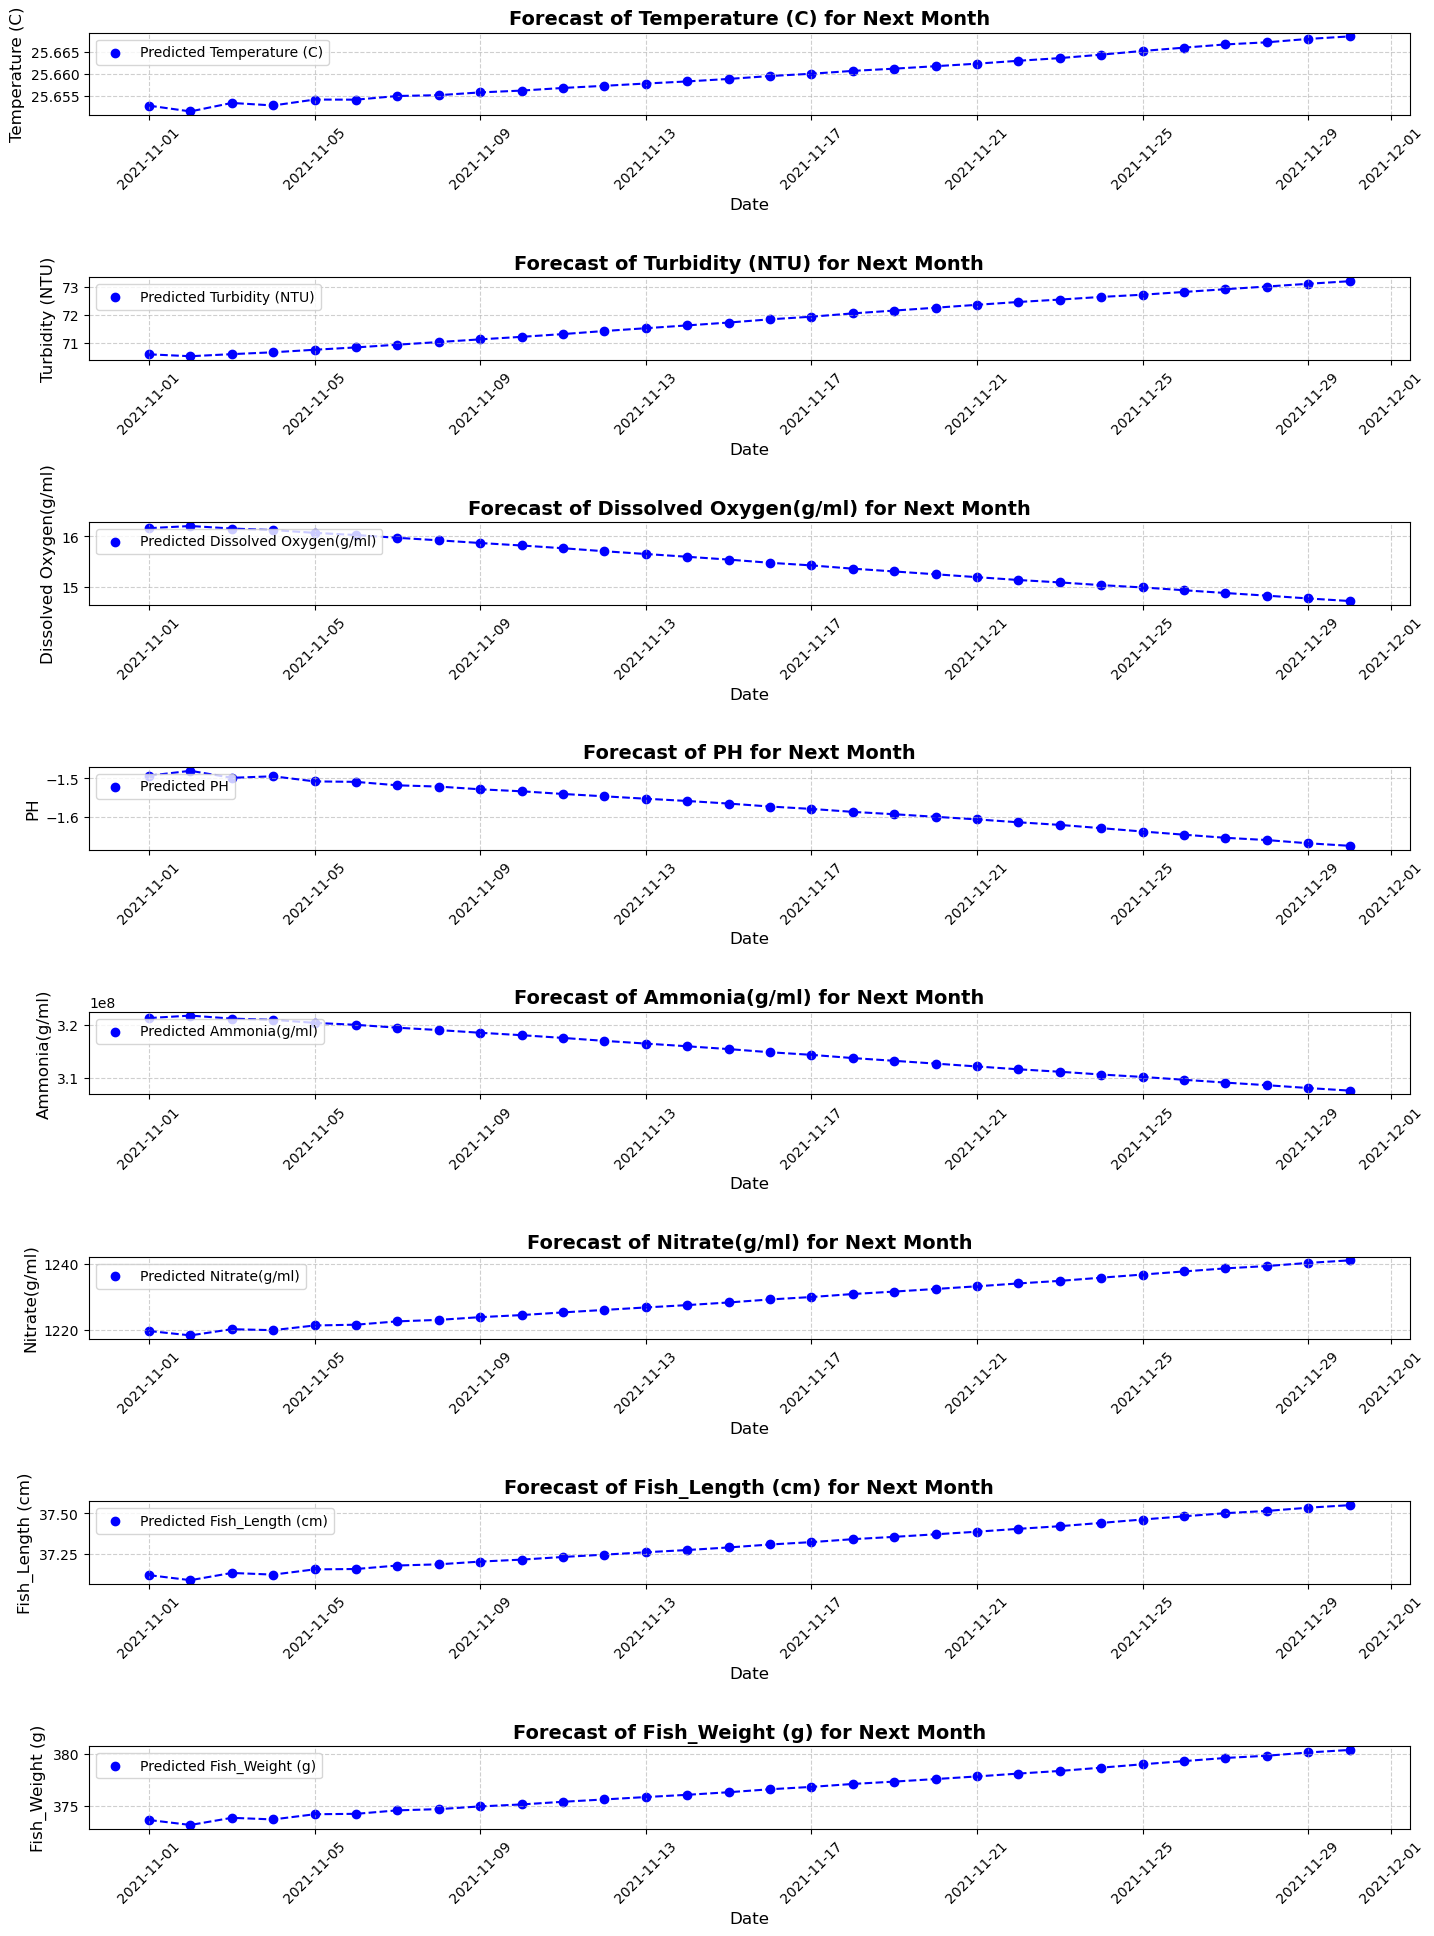

In [204]:
plt.figure(figsize=(15, 20))  # Increase height for more space

# Plot each feature with added spacing and individual styling
for i, column in enumerate(selected_columns):
    plt.subplot(len(selected_columns), 1, i + 1)
    plt.scatter(dates, predictions_original_scale[:, i], label=f'Predicted {column}', color='blue', marker='o')
    plt.plot(dates, predictions_original_scale[:, i], color='blue', linestyle='--')  # Add line for visual clarity
    plt.title(f'Forecast of {column} for Next Month', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)  # Softer grid for neatness

plt.tight_layout(pad=3.0)  # Increase padding between plots
plt.savefig("Forecaster.png")
plt.show()